# Exploratory Data Analysis

Import required Python packages.

In [5]:
# Enable inline plotting for Jupyter Notebooks
# This allows plots to be displayed within the notebook.
%matplotlib inline

# Importing necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations and working with arrays
from scipy.stats import trim_mean  # For calculating the trimmed mean

# import wquantiles  # For computing weighted quantiles

import seaborn as sns  # For data visualization
import matplotlib.pylab as plt  # For plotting
# import matplotlib.cm as cm

In [6]:
# Load data from a CSV file into a pandas DataFrame.
# The CSV file is located at the specified path.
state = pd.read_csv("C:/Users/admin/Downloads/practical-statistics-for-data-scientists-master/practical-statistics-for-data-scientists-master/data/state.csv")

# Print the first 8 rows of the DataFrame to get an overview of the data.
print(state.head(8))


         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


## To analyze the Population data, we will compute several central tendency measures:
- Mean: This is the average value of the Population column, calculated using the mean() method from pandas. It provides a measure of the central value of the data.

- Trimmed Mean: Unlike the mean, the trimmed mean excludes a certain percentage of the smallest and largest values before calculating the average. This method is useful for reducing the influence of outliers. We use the trim_mean function from scipy.stats to compute this measure, specifying the proportion of data to trim.

- Median: The median represents the middle value of the Population column when the data is sorted in ascending order. It is calculated using the median() method from pandas and provides a measure of central tendency that is less affected by extreme values compared to the mean.

**These measures offer insights into the distribution of population values, helping to understand the central characteristics of the data.**

In [7]:
# Display the column names of the DataFrame.
state.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [8]:
# Display the index (row labels) of the DataFrame.
state.index


RangeIndex(start=0, stop=50, step=1)

In [9]:
# Generate descriptive statistics for the numeric columns in the DataFrame.
state.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [10]:
# Calculate and print the mean (average) of the 'Population' column in the DataFrame.
print(state['Population'].mean())

6162876.3


In [11]:
# Access and display the 'Population' column of the DataFrame.
state['Population']

0      4779736
1       710231
2      6392017
3      2915918
4     37253956
5      5029196
6      3574097
7       897934
8     18801310
9      9687653
10     1360301
11     1567582
12    12830632
13     6483802
14     3046355
15     2853118
16     4339367
17     4533372
18     1328361
19     5773552
20     6547629
21     9883640
22     5303925
23     2967297
24     5988927
25      989415
26     1826341
27     2700551
28     1316470
29     8791894
30     2059179
31    19378102
32     9535483
33      672591
34    11536504
35     3751351
36     3831074
37    12702379
38     1052567
39     4625364
40      814180
41     6346105
42    25145561
43     2763885
44      625741
45     8001024
46     6724540
47     1852994
48     5686986
49      563626
Name: Population, dtype: int64

In [12]:
# Calculate and print the trimmed mean of the 'Population' column, excluding 20% of the smallest and largest values.
print(trim_mean(state['Population'], 0.2))

4413915.966666667


In [13]:
# Calculate and print the trimmed mean of the given list, excluding 10% of the smallest and largest values.
print(trim_mean([2, 5000, 7, 8, 10, 18, 90, 1000], 0.1))


766.875


In [14]:
# Calculate and print the median of the 'Population' column in the DataFrame.
print(state['Population'].median())

4436369.5


In [15]:
# Calculate and print the mean (average) of the 'Murder.Rate' column in the DataFrame.
print(state['Murder.Rate'].mean())

4.066


In [16]:
# Calculate and print the weighted average of the 'Murder.Rate' column, with weights based on the 'Population' column.
print(np.average(state['Murder.Rate'], weights=state['Population']))

4.445833981123393


# Estimates of Variability

---

**Standard Deviation**: The standard deviation measures the amount of variation or dispersion in the `Population` data. It indicates how spread out the values are from the mean. To compute the standard deviation, we use the `std()` method from pandas. A high standard deviation implies that the population values are widely dispersed around the mean, while a low standard deviation indicates that they are more closely clustered around the mean. This measure helps in understanding the variability and consistency of the population data.

---

In [17]:
# Calculate and print the standard deviation of the 'Population' column in the DataFrame.
print(state['Population'].std())

6848235.347401142


Interquartile range is calculated as the difference of the 75% and 25% quantile.

In [18]:
# Calculate and display the 95th percentile of the 'Population' column in the DataFrame.
state["Population"].quantile(0.95)

19118545.599999998

In [19]:
# Calculate and print the interquartile range (IQR) of the 'Population' column.
# The IQR is the difference between the 75th percentile and the 25th percentile.
print(state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

4847308.0


# Visualization

### Description for using the `quantile` method in pandas:

---

**Quantiles**: Quantiles are values that divide the data into intervals with equal probabilities. In pandas, the `quantile` method is used to calculate specific quantiles of a DataFrame or Series. For example, the 25th percentile (first quartile) is the value below which 25% of the data falls, and the 75th percentile (third quartile) is the value below which 75% of the data falls.

The `quantile` method allows us to specify the desired quantiles using a parameter. This method is helpful for understanding the distribution and spread of the data, and for identifying the range within which a certain percentage of the data lies. It is particularly useful in exploratory data analysis and for summarizing the distribution of values.

---

In [20]:
# Calculate and print the specified percentiles of the 'Murder.Rate' column.
# Percentiles include the 5th, 25th, 50th (median), 75th, and 95th.
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


In [21]:
# Define the list of percentiles to calculate
percentages = [0.05, 0.25, 0.5, 0.75, 0.95]

# Calculate the specified percentiles for the 'Murder.Rate' column
# and create a DataFrame from the results
df = pd.DataFrame(state['Murder.Rate'].quantile(percentages))

# Update the index of the DataFrame to show percentiles as percentages
df.index = [f'{p * 100}%' for p in percentages]

# Print the DataFrame with percentiles as columns
print(df.transpose())

             5.0%  25.0%  50.0%  75.0%  95.0%
Murder.Rate   1.6  2.425    4.0   5.55   6.51


---

**Boxplots**: Boxplots are a useful exploratory data analysis tool provided by pandas for visualizing the distribution of data. They offer a graphical summary of the central tendency, spread, and potential outliers in a dataset. A boxplot displays the median, quartiles, and potential outliers, providing insights into the range and variability of the data.

In a boxplot:
- The **box** represents the interquartile range (IQR), which is the range between the 25th percentile (first quartile) and the 75th percentile (third quartile).
- The **line** within the box indicates the median of the data.
- The **whiskers** extend from the edges of the box to the smallest and largest values within a specified range (typically 1.5 times the IQR).
- **Outliers** are plotted as individual points beyond the whiskers.

Pandas allows for the creation of boxplots using the `boxplot()` method, which helps in comparing distributions across different groups and identifying any potential anomalies or patterns in the data.

---

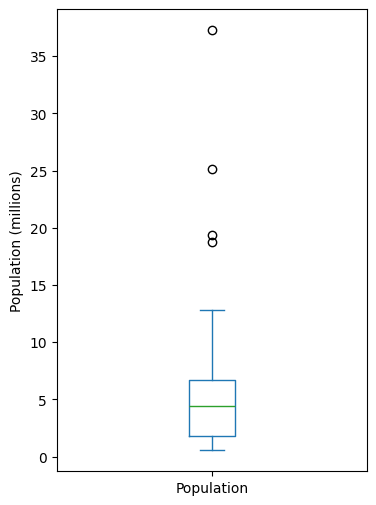

In [22]:
# Create a box plot of the 'Population' column, with population values converted to millions for better readability.
# Set the figure size to 4 inches by 6 inches.
ax = (state['Population'] / 1_000_000).plot.box(figsize=(4, 6))

# Set the label for the y-axis to indicate the unit as 'Population (millions)'.
ax.set_ylabel('Population (millions)')

# Adjust layout parameters to fit the plot into the figure area (commented out in this case).
# plt.tight_layout()

# Display the plot.
plt.show()


## Frequency Table and Histograms
---

**Frequency Table and Histograms**: Both frequency tables and histograms are essential tools for understanding the distribution of data.

1. **Frequency Table**: A frequency table provides a tabular summary of how often different values or ranges of values occur within a dataset. It lists the unique values (or bins) and their corresponding frequencies (counts). This table is particularly useful for categorical data or for summarizing how data points are distributed across different ranges.

2. **Histograms**: Histograms offer a graphical representation of data distribution. They display the frequency of data points within specified intervals (bins). Each bar in the histogram represents the count of observations within a bin, providing a visual insight into the distribution, central tendency, and spread of the data. Histograms are particularly useful for continuous data and help in identifying patterns such as skewness or multimodality.

Together, frequency tables and histograms provide complementary views of data distribution, aiding in data analysis and interpretation by showing how data values are spread across different ranges or categories.

---
*The `cut` method for _pandas_ data splits the dataset into bins. There are a number of arguments for the method. The following code creates equal sized bins. The method `value_counts` returns a frequency table.*

In [23]:
# Bin the 'Population' column into 10 equal-width bins.
binnedPopulation = pd.cut(state['Population'], 10)

# Print the count of observations in each bin.
print(binnedPopulation.value_counts())

Population
(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: count, dtype: int64


In [24]:
# Assign a name to the 'binnedPopulation' Series for easier identification.
binnedPopulation.name = 'binnedPopulation'

# Concatenate the 'binnedPopulation' Series to the original DataFrame along the columns (axis=1).
df = pd.concat([state, binnedPopulation], axis=1)

# Sort the DataFrame by the 'Population' column to order the data.
df = df.sort_values(by='Population')

# Initialize an empty list to store group information.
groups = []

# Group the DataFrame by 'binnedPopulation' and iterate over each group.
for group, subset in df.groupby(by='binnedPopulation'):
    groups.append({
        'BinRange': group,  # The bin range (e.g., '5000000-10000000')
        'Count': len(subset),  # Number of states in this bin
        'States': ','.join(subset.Abbreviation)  # Concatenated abbreviations of states in this bin
    })

# Create a DataFrame from the groups list and print it.
print(pd.DataFrame(groups))


                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

C:\Users\admin\AppData\Local\Temp\ipykernel_22944\2158831780.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for group, subset in df.groupby(by='binnedPopulation'):


_Pandas_ also supports histograms for exploratory data analysis.

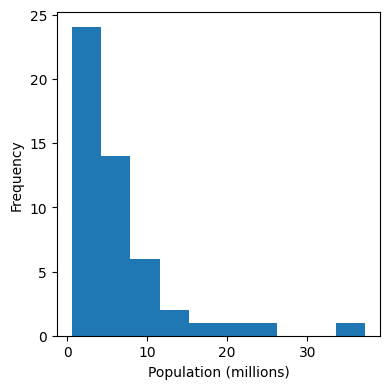

In [25]:
# Create a histogram of the 'Population' column, with population values converted to millions for better readability.
# Set the figure size to 4 inches by 4 inches.
ax = (state['Population'] / 1_000_000).plot.hist(figsize=(4, 4))

# Set the label for the x-axis to indicate the unit as 'Population (millions)'.
ax.set_xlabel('Population (millions)')

# Adjust layout parameters to fit the plot into the figure area and prevent clipping of plot elements.
plt.tight_layout()

# Display the plot.
plt.show()

## Density Estimates
---

**Density Plots**: Density plots are an alternative to histograms for visualizing the distribution of data. Unlike histograms, which use discrete bins, density plots provide a smooth curve that estimates the probability density function of the data. This smoothness helps to reveal underlying patterns and distributions more clearly, particularly when dealing with continuous data.

In a density plot:
- The **curve** represents the estimated density of data points across the range of values.
- The **area under the curve** equals 1, representing the total probability.

The `bw_method` argument allows you to control the smoothness of the density curve. A higher `bw_method` value results in a smoother curve by increasing the bandwidth of the kernel density estimate, while a lower value provides a more detailed curve that may better reflect the data's variability but can be noisier.

*Using density plots with the `bw_method` argument enables more flexibility in analyzing and interpreting the distribution of data points, making it easier to identify trends and patterns.*

---

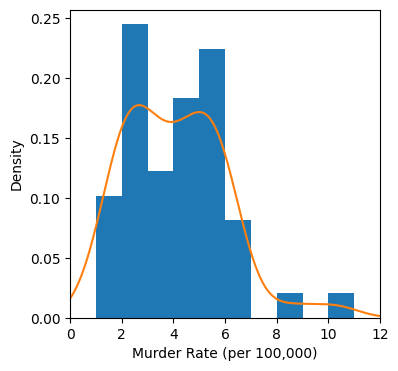

In [26]:
# Create a histogram of the 'Murder.Rate' column with density normalization.
# Set the x-axis limit to range from 0 to 12 and use bins from 1 to 12.
# Set the figure size to 4 inches by 4 inches.
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12], 
                                    bins=range(1, 12), figsize=(4, 4))

# Overlay a kernel density estimate (KDE) plot on the histogram to show the distribution's smooth curve.
state['Murder.Rate'].plot.density(ax=ax)

# Set the label for the x-axis to indicate the unit as 'Murder Rate (per 100,000)'.
ax.set_xlabel('Murder Rate (per 100,000)')

# Adjust layout parameters to fit the plot into the figure area (commented out in this case).
# plt.tight_layout()

# Display the plot.
plt.show()

# Exploring Binary and Categorical Data


---

**Bar Charts**: Bar charts are a useful way to visualize and compare the values of a single categorical variable. In pandas, bar charts can be created to display the frequency or count of different categories within a dataset.

In a bar chart:
- **Bars** represent the values or frequencies for each category.
- The **height** of each bar corresponds to the magnitude of the value or count for that category.
- **Categorical Variables** are displayed on the x-axis, and the corresponding values or frequencies are shown on the y-axis.

Pandas provides an easy way to create bar charts using the `plot.bar()` method. This is especially useful for summarizing categorical data, comparing different categories, and visualizing the distribution of data points across various categories.

Bar charts are particularly effective for categorical data analysis and are commonly used to present survey results, count data, or any scenario where data can be grouped into distinct categories.

---

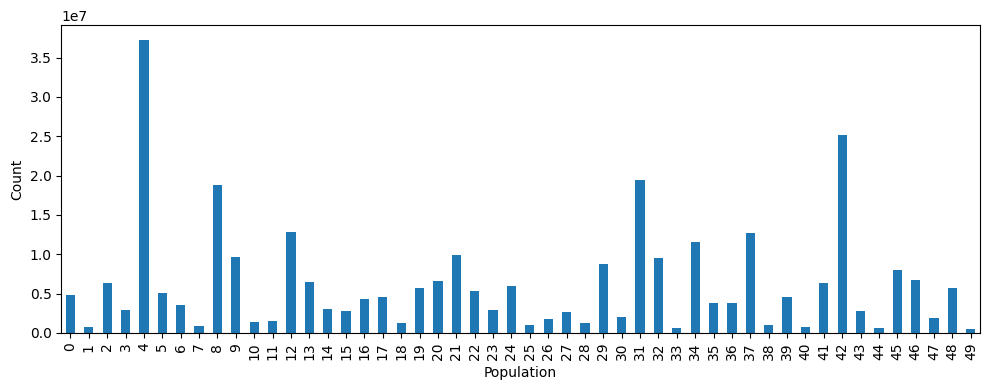

In [27]:
# Create a bar plot of the 'Population' column.
# Set the figure size to 10 inches by 4 inches and disable the legend.
ax = state["Population"].transpose().plot.bar(figsize=(10, 4), legend=False)

# Set the label for the x-axis to 'Population'.
ax.set_xlabel('Population')

# Set the label for the y-axis to 'Count', indicating the number of occurrences for each population value.
ax.set_ylabel('Count')

# Adjust layout parameters to fit the plot into the figure area and prevent clipping of plot elements.
plt.tight_layout()

# Display the plot.
plt.show()

---

**Correlation**: Correlation measures the strength and direction of the linear relationship between two variables. It provides insights into how changes in one variable are associated with changes in another. The correlation coefficient ranges from -1 to 1:

- **1**: Indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases proportionally.
- **-1**: Indicates a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally.
- **0**: Indicates no linear relationship between the variables.

Correlation is typically quantified using the Pearson correlation coefficient, which is a measure of linear dependence. It is computed using the `corr()` method in pandas, which calculates the correlation matrix for numerical columns in a DataFrame.

Understanding correlation helps in identifying relationships between variables, predicting one variable based on another, and uncovering potential patterns in the data. However, it's important to remember that correlation does not imply causation; it merely indicates an association between variables.

---

In [28]:
# Import the LabelEncoder class from scikit-learn's preprocessing module.
# LabelEncoder is used to convert categorical labels into numerical values.
from sklearn.preprocessing import LabelEncoder

In [29]:
# Display the data types of each column in the DataFrame.
print(state.dtypes)

State            object
Population        int64
Murder.Rate     float64
Abbreviation     object
dtype: object


In [30]:
# Get the shape of the 'State' column in the DataFrame.
print(state["State"].shape)

(50,)


In [31]:
# Create an instance of LabelEncoder
Le = LabelEncoder()

# Fit the LabelEncoder on the 'State' column and transform the values to numeric labels.
# This will replace the original categorical state names with numerical codes.
state['State'] = Le.fit_transform(state['State'])

# Fit the LabelEncoder on the 'Abbreviation' column and transform the values to numeric labels.
# This will replace the original categorical state abbreviations with numerical codes.
state["Abbreviation"] = Le.fit_transform(state["Abbreviation"])

In [32]:
# Compute and display the Pearson correlation matrix for the numerical columns in the DataFrame.
print(state.corr(method='pearson'))

                 State  Population  Murder.Rate  Abbreviation
State         1.000000   -0.093022    -0.226653      0.993373
Population   -0.093022    1.000000     0.182069     -0.092725
Murder.Rate  -0.226653    0.182069     1.000000     -0.220368
Abbreviation  0.993373   -0.092725    -0.220368      1.000000


Next we focus on funds traded on major exchanges (sector == 'etf'). 

- Due to the large number of columns in this table, looking at the correlation matrix is cumbersome and it's more convenient to plot the correlation as a heatmap. The _seaborn_ package provides a convenient implementation for heatmaps.

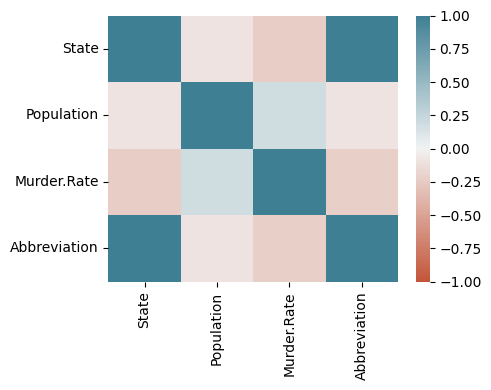

In [33]:
# Create a figure and a set of subplots with the specified size (5 inches by 4 inches).
fig, ax = plt.subplots(figsize=(5, 4))

# Generate a heatmap to visualize the correlation matrix of the DataFrame.
# The color range is set from -1 to 1, and a diverging color palette is used for better visualization.
ax = sns.heatmap(state.corr(), vmin=-1, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

# Adjust the layout to ensure everything fits well within the figure area.
plt.tight_layout()

# Display the heatmap.
plt.show()

The above heatmap works when you have color. For the greyscale images, as used in the book, we need to visualize the direction as well. The following code shows the strength of the correlation using ellipses.

## Scatterplots
---

**Scatterplots**: Scatterplots are a fundamental tool for visualizing the relationship between two numerical variables. In pandas, scatterplots can be easily created to show how data points are distributed across two dimensions.

In a scatterplot:
- **Points** represent individual data entries, with their position determined by the values of two variables.
- **Markers** can be customized to improve visualization. For instance, specifying the marker as `$\u25EF$` uses an open circle (●) for each point.

Creating scatterplots with pandas is straightforward using the `plot.scatter()` method. This method allows you to plot data points for two variables, providing a clear view of any potential correlations, trends, or patterns.

Scatterplots are particularly useful for exploring relationships between variables, detecting outliers, and assessing the nature of the data distribution. Customizing the marker style, such as using open circles, can enhance readability and presentation, especially when dealing with large datasets.

---

<Axes: xlabel='Population', ylabel='Murder.Rate'>

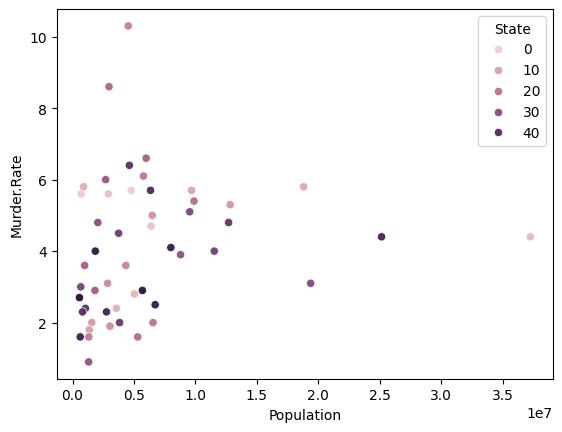

In [34]:
# Create a scatter plot to visualize the relationship between 'Population' and 'Murder.Rate'.
# Different colors are used for each 'State' to differentiate between them.
sns.scatterplot(data=state, x='Population', y='Murder.Rate', hue="State")

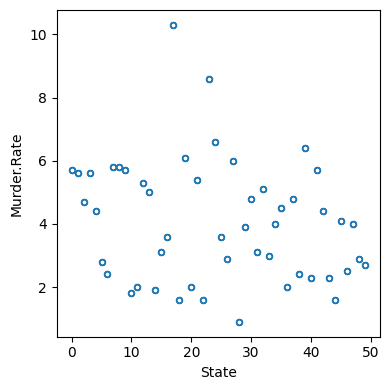

In [35]:
# Create a scatter plot with 'State' on the x-axis and 'Murder.Rate' on the y-axis.
# The figure size is set to 4 inches by 4 inches, and a custom marker (circle) is used.
ax = state.plot.scatter(x='State', y='Murder.Rate', figsize=(4, 4), marker='$\u25EF$')

# Set the label for the x-axis to 'State'.
ax.set_xlabel('State')

# Set the label for the y-axis to 'Murder.Rate'.
ax.set_ylabel('Murder.Rate')

# Adjust the layout to ensure that the plot elements fit well within the figure area.
plt.tight_layout()

# Display the scatter plot.
plt.show()

Line2D(_child2)


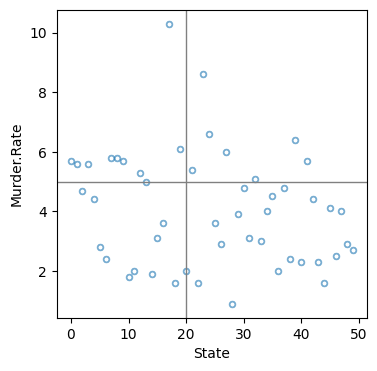

In [36]:
# Create a scatter plot with 'State' on the x-axis and 'Murder.Rate' on the y-axis.
# The figure size is set to 4 inches by 4 inches, a custom marker (circle) is used, and transparency is set to 0.5.
ax = state.plot.scatter(x='State', y='Murder.Rate', figsize=(4, 4), marker='$\u25EF$', alpha=0.5)

# Set the label for the x-axis to 'State'.
ax.set_xlabel('State')

# Set the label for the y-axis to 'Murder.Rate'.
ax.set_ylabel('Murder.Rate')

# Add a horizontal line at y=5 for reference, with grey color and line width of 1.
ax.axhline(5, color='grey', lw=1)

# Add a vertical line at x=20 for reference, with grey color and line width of 1.
# Print the vertical line object for debugging or reference.
print(ax.axvline(20, color='grey', lw=1))

- *********************************************************************************************************************************************************************************************************************************


## Sample Visualizations around the same data.
**Tools Used**:
- matplotlib
- seaborn
- plotly 

# State Data Analysis

This project analyzes data about U.S. states, including population and murder rates.

## Visualizations

1. Population Distribution
2. Murder Rate Distribution
3. Population vs Murder Rate Scatter Plot
4. Top 10 States by Population

## Key Insights

- Population distribution is right-skewed, with few states having very high populations.
- Murder rate distribution is more uniform.
- No clear linear relationship between population size and murder rate.
- California, Texas, and New York are among the most populous states.

## Tools Used
- Pandas for data manipulation
- Matplotlib and Seaborn for visualization

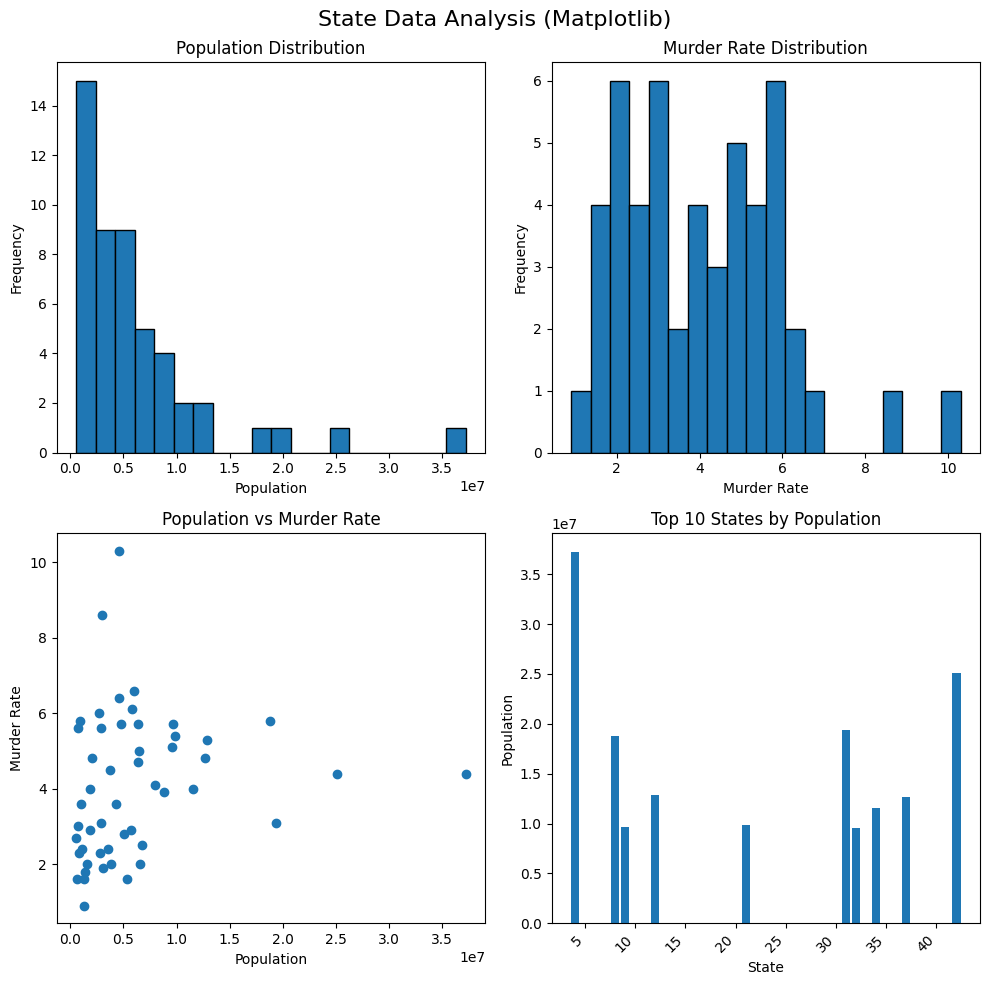

Matplotlib plots generated.


In [37]:
# Matplotlib
df = state
# Set up the plots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle('State Data Analysis (Matplotlib)', fontsize=16)

# Population Distribution
axs[0, 0].hist(state['Population'], bins=20, edgecolor='black')
axs[0, 0].set_title('Population Distribution')
axs[0, 0].set_xlabel('Population')
axs[0, 0].set_ylabel('Frequency')

# Murder Rate Distribution
axs[0, 1].hist(state['Murder.Rate'], bins=20, edgecolor='black')
axs[0, 1].set_title('Murder Rate Distribution')
axs[0, 1].set_xlabel('Murder Rate')
axs[0, 1].set_ylabel('Frequency')

# Population vs Murder Rate Scatter Plot
axs[1, 0].scatter(state['Population'], state['Murder.Rate'],label=Le.inverse_transform(state.State))
axs[1, 0].set_title('Population vs Murder Rate')
axs[1, 0].set_xlabel('Population')
axs[1, 0].set_ylabel('Murder Rate')

# Top 10 States by Population
top_10 = state.nlargest(10, 'Population')
axs[1, 1].bar(top_10['State'], top_10['Population'])
axs[1, 1].set_title('Top 10 States by Population')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Population')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

print("Matplotlib plots generated.")

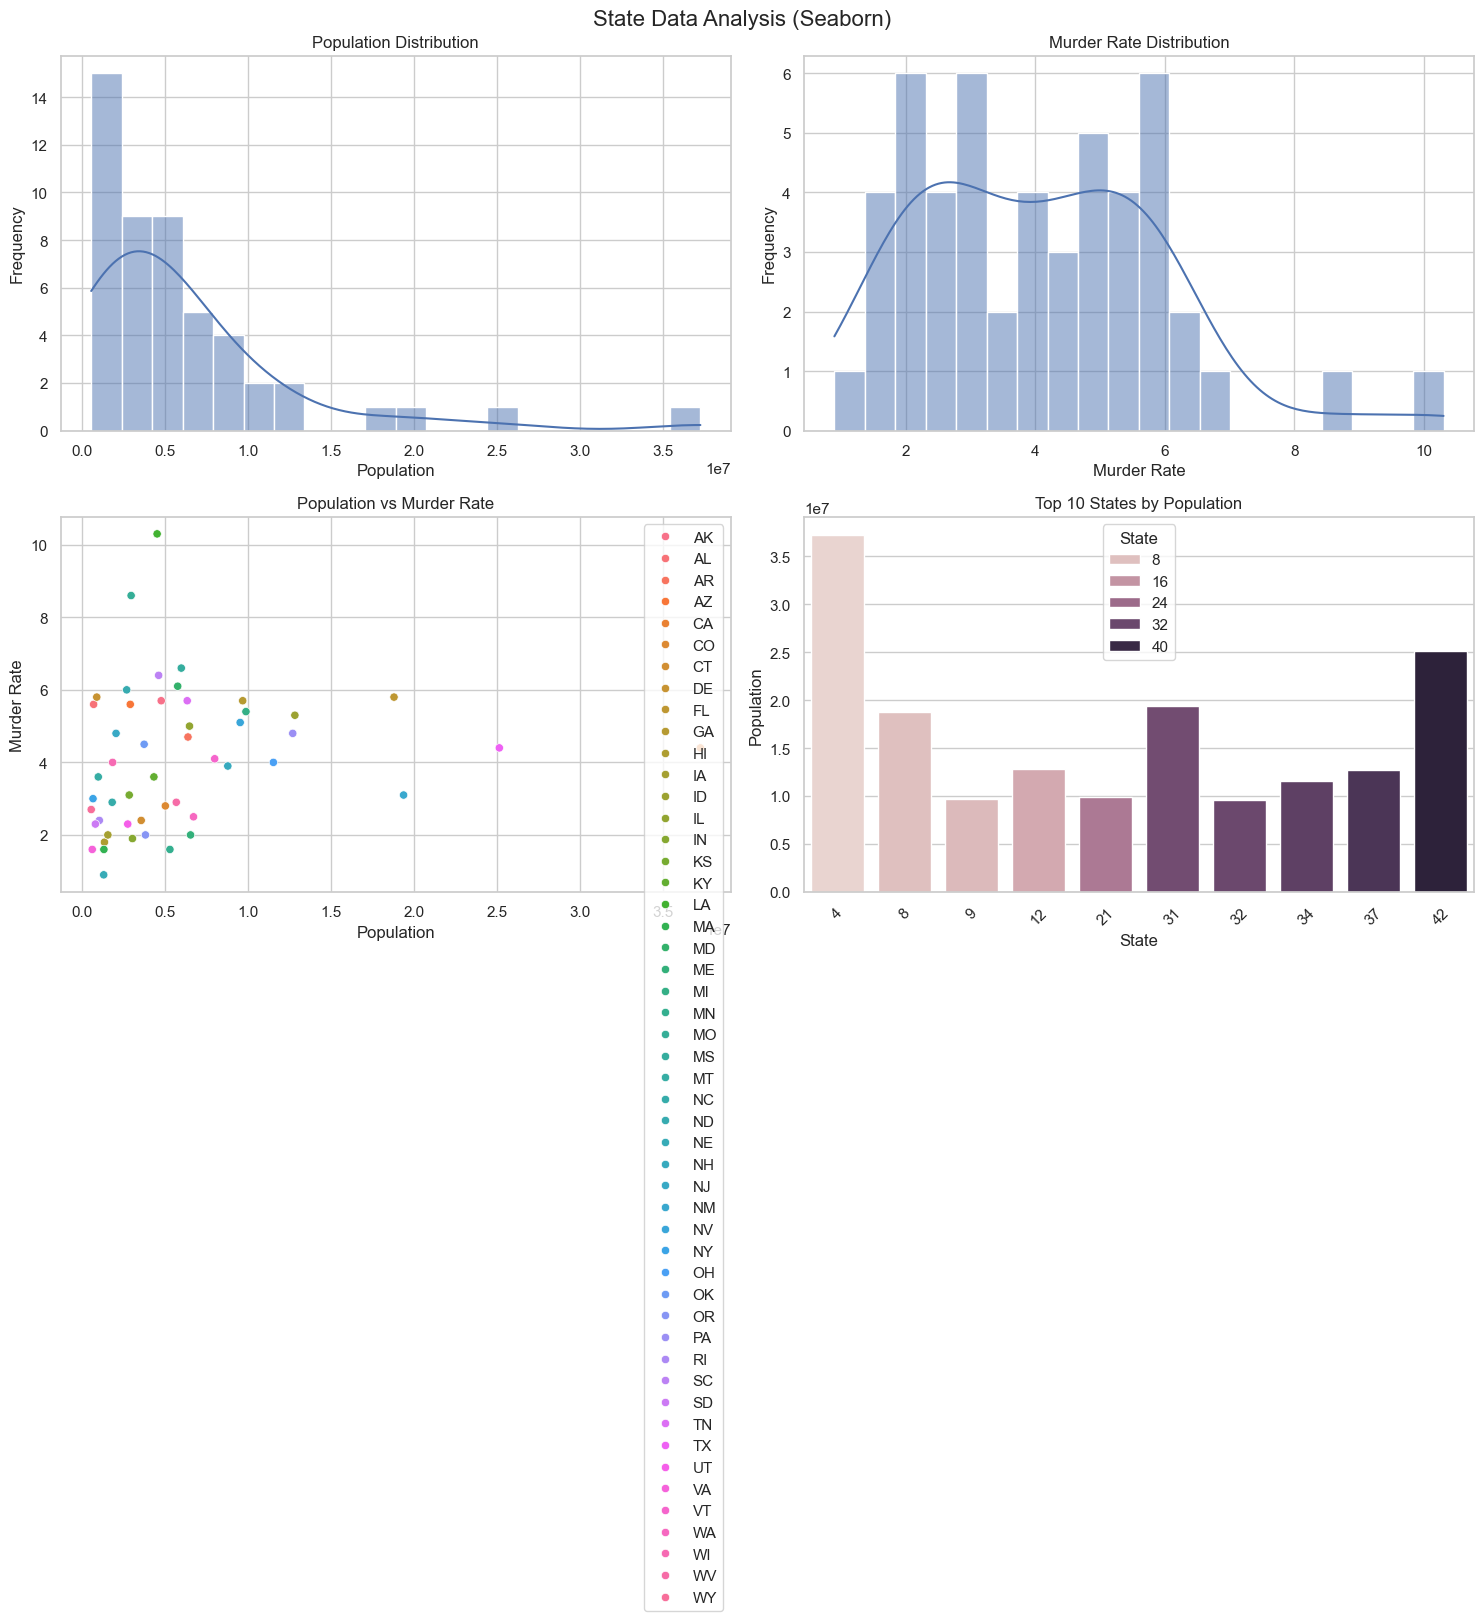

Seaborn plots generated.


In [38]:
# The code snippet creates a series of Seaborn visualizations to analyze state population and murder rate data, including histograms, a scatter plot, and a bar plot.
# Set the style for seaborn plots
sns.set(style='whitegrid')

# Create a figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('State Data Analysis (Seaborn)', fontsize=16)

# Population Distribution
sns.histplot(state['Population'], bins=20, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Population Distribution')
axs[0, 0].set_xlabel('Population')
axs[0, 0].set_ylabel('Frequency')

# Murder Rate Distribution
sns.histplot(state['Murder.Rate'], bins=20, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Murder Rate Distribution')
axs[0, 1].set_xlabel('Murder Rate')
axs[0, 1].set_ylabel('Frequency')

# Population vs Murder Rate Scatter Plot
sns.scatterplot(x='Population', y='Murder.Rate', data=state, ax=axs[1, 0], hue=Le.inverse_transform(state.State))
axs[1, 0].set_title('Population vs Murder Rate')
axs[1, 0].set_xlabel('Population')
axs[1, 0].set_ylabel('Murder Rate')

# Top 10 States by Population
sns.barplot(x='State', y='Population', data=top_10, ax=axs[1, 1], hue='State')
axs[1, 1].set_title('Top 10 States by Population')
axs[1, 1].set_xlabel('State')
axs[1, 1].set_ylabel('Population')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("Seaborn plots generated.")

In [39]:
import plotly.express as px
import plotly.io as pio

# Load the dataset


# Plotly Population Distribution
fig_population = px.histogram(state, x='Population', nbins=20, title='Population Distribution', labels={'Population': 'Population'})
fig_population.update_layout(bargap=0.2)
fig_population.show()

# Plotly Murder Rate Distribution
fig_murder_rate = px.histogram(state, x='Murder.Rate', nbins=20, title='Murder Rate Distribution', labels={'Murder.Rate': 'Murder Rate'})
fig_murder_rate.update_layout(bargap=0.2)
fig_murder_rate.show()

# Plotly Population vs Murder Rate Scatter Plot
fig_scatter = px.scatter(state, x='Population', y='Murder.Rate', title='Population vs Murder Rate', labels={'Population': 'Population', 'Murder.Rate': 'Murder Rate'})
fig_scatter.show()

# Define the top 10 states by population
# Sort the dataframe by population in descending order and select the top 10
top_10 = state.sort_values(by='Population', ascending=False).head(10)

# Plotly Top 10 States by Population
fig_top_10 = px.bar(top_10, x='State', y='Population', title='Top 10 States by Population', labels={'State': 'State', 'Population': 'Population'})
fig_top_10.update_xaxes(categoryorder='total descending')
fig_top_10.show()

correlation_matrix = state.corr()

fig_heatmap = px.imshow(correlation_matrix, 
                        labels=dict(x="Variables", y="Variables", color="Correlation"),
                        x=correlation_matrix.columns,
                        y=correlation_matrix.columns,
                        color_continuous_scale='RdBu_r',
                        zmin=-1, zmax=1)
fig_heatmap.show()

print("All plots have been displayed in the notebook.")

All plots have been displayed in the notebook.


# **<span style="color:green;">Thank You!</span>**

**Thank you for taking the time to explore this Ipython Notebook! 🎉**

**We hope you found the analyses and visualizations insightful and useful. If you have any questions or feedback, feel free to reach out. Your input is greatly appreciated!**

**Happy data exploring and visualizing!**

**Best regards,**

**CQAI Engineering**


![alt text](avatar.avif)